In [1]:
import tensorflow as tf
from tensorflow import keras

# bring in the mnist dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

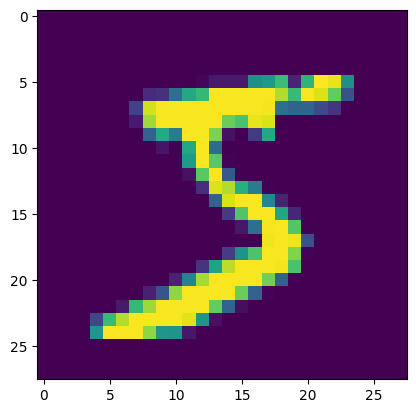

In [2]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [3]:
leNet5 = keras.Sequential([
    keras.Input(shape=(32, 32, 1)),
    # rescaling layer to normalize the values to range [0,1]
    keras.layers.Rescaling(scale=1./255),
    # 6 filters that are 5x5 with "valid" padding (none)
    keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh'),
    # downsample the feature maps so they are halved
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    #keras.layers.MaxPooling2D is another pooling option
    # 16 filters
    keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    # The rest of this is the fully-connected part of the network
    keras.layers.Flatten(),
    # another option instead of just flattening is GlobalAveragePooling2D which will take the avg of each feature map
    #keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(units=120, activation='tanh'),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=10, activation='softmax')
])
leNet5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
leNet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import numpy as np

# pad the images so that they are 32x32 and also normalize them
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
x_train.shape

(60000, 32, 32, 1)

In [6]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

In [7]:
history = leNet5.fit(x_train, y_train, epochs=25, validation_split=0.2, callbacks=callbacks)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8755 - loss: 0.4383 - val_accuracy: 0.9625 - val_loss: 0.1238
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9657 - loss: 0.1074 - val_accuracy: 0.9771 - val_loss: 0.0769
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0620 - val_accuracy: 0.9806 - val_loss: 0.0626
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.9808 - val_loss: 0.0674
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0363 - val_accuracy: 0.9815 - val_loss: 0.0606
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9910 - loss: 0.0285 - val_accuracy: 0.9832 - val_loss: 0.0596
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9832 - val_loss: 0.0592
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0180 - 

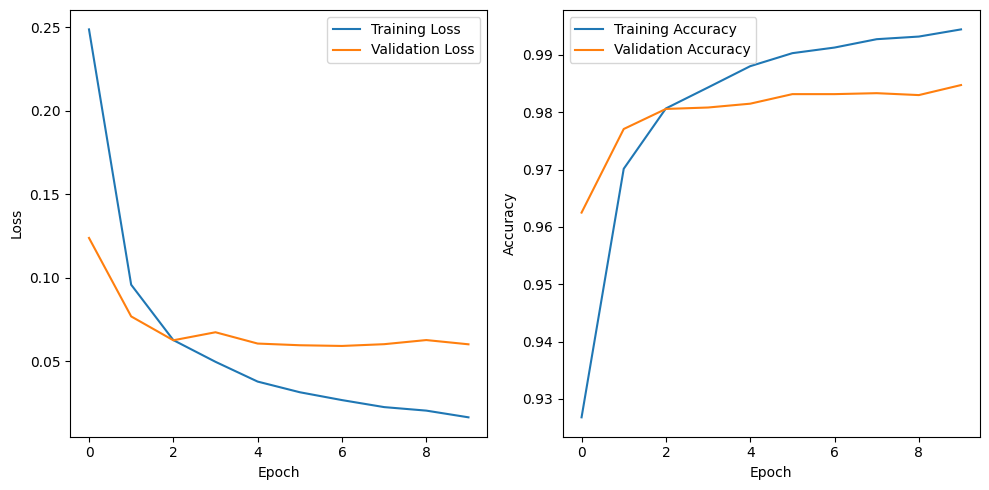

In [8]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# evaluate the model
test_loss, test_acc = leNet5.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9798 - loss: 0.0630
Test accuracy: 0.9835000038146973
Test loss: 0.053020037710666656
